In [627]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
pd.set_option('use_inf_as_na', True)
from collections import Counter

In [628]:
raw_data = pd.read_pickle(r'C:\Users\niels\data\dataset.pkl')
data = raw_data[raw_data['market_cap'] > 1000.0]
data.fillna(0.0,inplace=True)

C:\Users\niels\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [629]:
def f(x):
    if x > 0.01:
        return 1
    elif x < -0.01:
        return -1
    else:
    
        return 0

In [630]:
data['rel_performance'] = data['pred_rel_return'].apply(f)
data.reset_index(inplace=True,)
data.set_index('date',inplace=True)

C:\Users\niels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [631]:
df_1 = data.loc['2010-01-01':'2013-01-01']
df_2 = data.loc['2010-04-01':'2013-04-01']
df_valid = data.loc['2013-04-01':'2013-07-01']
df_test = data.loc['2013-07-01':'2013-10-01']

In [632]:
train_1 = df_1.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)
train_2 = df_2.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

valid = df_valid.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)
test = df_test.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

In [633]:
train_1_stock_returns = df_1['next_period_return']
valid_stock_returns = df_valid['next_period_return']
train_2_stock_returns = df_2['next_period_return']
test_stock_returns = df_test['next_period_return']

y_1 = df_1['rel_performance']
y_2 = df_2['rel_performance']
y_valid = df_valid['rel_performance']
y_test = df_test['rel_performance']

y_1 = y_1.values
y_2 = y_2.values
y_valid = y_valid.values
y_test = y_test.values

In [548]:
rf_clf = RandomForestClassifier(n_estimators=10,min_samples_leaf=1400)

In [680]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),learning_rate=0.5,n_estimators=25)

In [681]:
%timeit ada_clf.fit(train_1,y_1)

10.5 s ± 349 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [682]:
len(train_1.columns)

71

In [683]:
preds = ada_clf.predict(valid)

In [684]:
ada_clf.score(valid,y_valid)

0.4491428571428571

In [685]:
confusion_matrix(y_valid,preds)

array([[152,   7, 580],
       [ 32,   6,  76],
       [266,   3, 628]], dtype=int64)

In [686]:
def adaboost_feat_importances(m, df):
        
    return pd.DataFrame({'cols':df.columns, 'feat_imp': m.feature_importances_}
                       ).sort_values('feat_imp', ascending=False)

def plot_fi(fi): return fi.plot('cols', 'feat_imp', 'barh', figsize=(12,7), legend=False)

In [687]:
fi = adaboost_feat_importances(ada_clf,train_1)

In [688]:
features = fi[(fi['feat_imp'] > 0.006)]

In [689]:
features.shape

(55, 2)

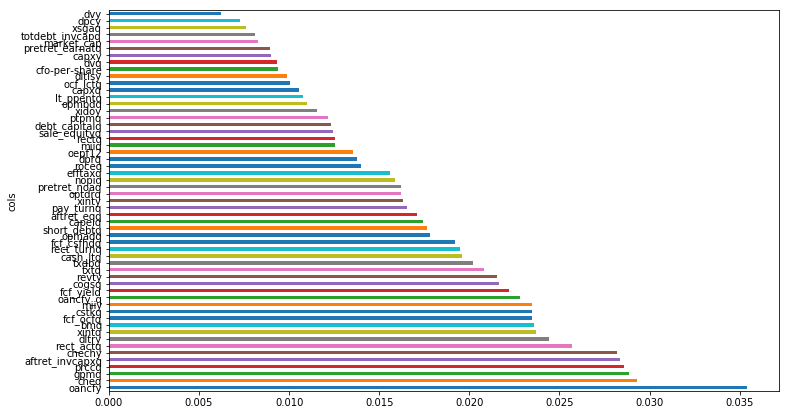

In [690]:
plot_fi(features);

In [645]:
features

,cols,feat_imp
112,gpmq,0.023083
148,short_debtq,0.021091
99,capeiq,0.020295
174,sale_equityq,0.019603
71,dpcy,0.019434
156,fcf_yield,0.017232
36,nopiq,0.017122
4,cheq,0.016338
155,fcf_csfhdq,0.015632
102,oancfy_q,0.014830


In [691]:
train_1 = train_1[features['cols'].values]
valid = valid[features['cols'].values]

In [692]:
%timeit ada_clf.fit(train_1,y_1)
ada_clf.score(train_1,y_1)

8.73 s ± 341 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.5584624784758095

In [693]:
pred_valid = ada_clf.predict(valid)
ada_clf.score(valid,y_valid)

0.464

In [694]:
(pred_valid * valid_stock_returns).sum()

52.88898099999999

In [695]:
Counter(pred_valid)

Counter({1: 1299, -1: 439, 0: 12})

In [696]:
def profit_importance(m,df,rets):
#     np.random.seed(123)
    profit = []
    for col in df.columns:
        prof = []
        for _ in range(10):
            X = df.copy()
            X[col] = np.random.permutation(X[col].values)
            prediction = m.predict(X)
            prof.append((prediction * rets).sum())
        profit.append(np.mean(prof))
    return profit

In [697]:
def adaboost_profit_importance(m, df,rets):
    return pd.DataFrame({'cols':df.columns, 'pi_imp':profit_importance(m,df,rets)}
                       ).sort_values('pi_imp', ascending=True)

In [698]:
pi = adaboost_profit_importance(ada_clf,valid,valid_stock_returns)
pi

,cols,pi_imp
1,cheq,46.392987
3,prccq,47.540960
49,pretret_earnatq,47.821608
46,cfo-per-share,50.131179
34,oepf12,50.399208
31,efftaxq,50.509509
40,xidoy,50.868350
33,dprq,50.968646
50,market_cap,51.193358
12,miiy,51.443918


In [699]:
profits = []
feat=[]

train = train_1.copy()
validation = valid.copy()

while len(train.columns)>1:

    pred_valid = ada_clf.predict(validation)
       
    print((pred_valid * df_valid['next_period_return']).sum())
    profits.append((pred_valid * df_valid['next_period_return']).sum())
    feat.append(train.columns)
    
    col_to_drop = pi.iloc[-1]['cols']
    train.drop(col_to_drop,axis=1,inplace=True)
    validation.drop(col_to_drop,axis=1,inplace=True)

    ada_clf.fit(train,y_1)
    pi = adaboost_profit_importance(ada_clf,validation,df_valid['next_period_return'])

        


52.88898099999999
63.59339100000001
47.58450000000008
49.57351800000002
46.193224
46.89614799999996
67.97944799999999
56.31752400000003
56.262306000000024
63.68693400000004
60.24365100000003
53.10081899999997
67.077441
75.33535799999999
74.01169899999998
58.170379999999994
65.48112400000001
71.60570999999999
83.276287
81.48024600000002
65.59537200000004
78.64752600000003
69.605549
68.54044300000002
73.296707
82.661448
72.00813600000001
65.04137699999998
78.03697799999995
81.33400199999996
74.142774
80.38159299999997
76.863482
89.16892799999997
91.17972599999996
92.39458699999997
82.46197999999997
83.774709
87.7404
93.18857900000006
87.277898
94.200714
88.09936400000004
84.53606500000004
94.71490600000003
90.15468800000002
82.841442
79.68074500000002
89.42791500000001
93.359272
81.612878
88.57894200000004
92.34485299999999
88.80936699999998


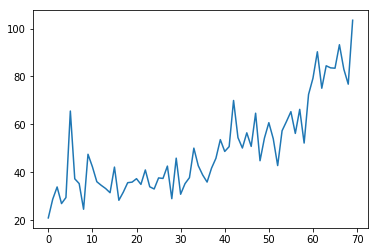

In [655]:
plt.plot(profits);

In [656]:
n = np.argmax(profits)
profits[n]

103.46943399999998

In [657]:
n

69

In [658]:
optim_feats = feat[n]
optim_feats


Index(['opmadq', 'cfo-per-share'], dtype='object')

In [659]:
train_1_optim = train_1[optim_feats]
valid_optim = valid[optim_feats]


ada_clf.fit(train_1_optim,y_1)
print(ada_clf.score(train_1_optim,y_1))
pred_valid_tree = ada_clf.predict(valid_optim)
print(ada_clf.score(valid_optim,y_valid))
(pred_valid_tree * valid_stock_returns).sum()

0.521302005221352
0.49942857142857144


103.46943399999998

In [660]:
train_2_tree = train_2[optim_feats]
test_tree = test[optim_feats]
ada_clf.fit(train_2_tree,y_2)
pred_test_tree = ada_clf.predict(test_tree)
(pred_test_tree * test_stock_returns).sum()

74.73829199999996

In [661]:
from scipy.cluster import hierarchy as hc
import scipy.stats

C:\Users\niels\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


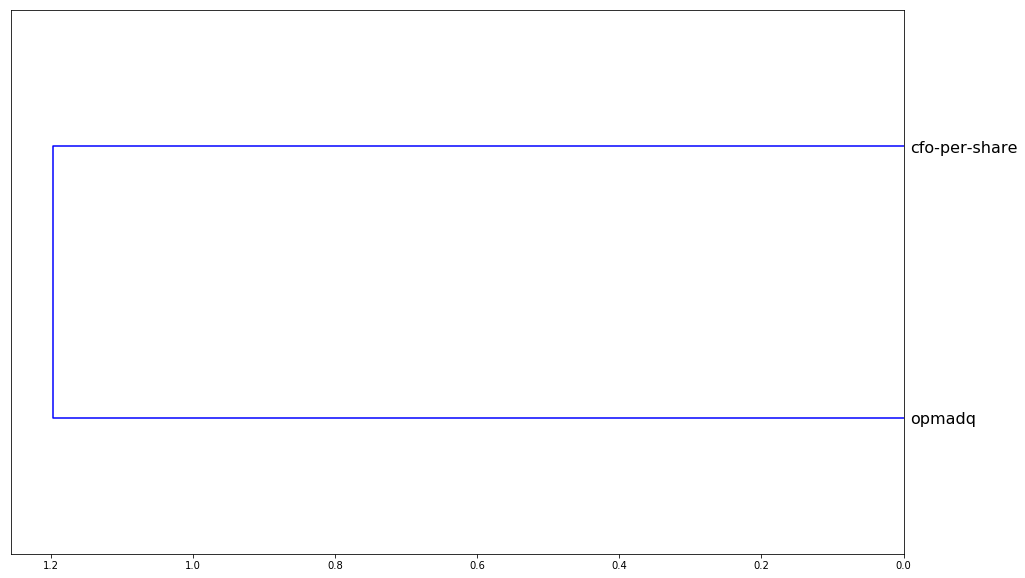

In [662]:
corr = np.round(scipy.stats.spearmanr(train_1_optim).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=train_1_optim.columns, orientation='left', leaf_font_size=16)
plt.show()

In [262]:
start_dates = [pd.to_datetime('2000-01-01') + pd.DateOffset(months = 3 * i) for i in range(62)]
end_dates = [d + pd.DateOffset(months = 36) for d in start_dates]

In [263]:
training_frames = [data.loc[d:d+pd.DateOffset(months = 36)] for d in start_dates]
test_frames = [data.loc[d + pd.DateOffset(months=3):d+pd.DateOffset(months = 6)] for d in end_dates]

In [264]:
training_data = [d.reset_index().drop
                                 (['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in training_frames]

In [265]:
test_data = [d.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in test_frames]

In [266]:
training_labels = [d['rel_performance'].values for d in training_frames]

In [663]:
opt_training_data = [t[optim_feats] for t in training_data]
opt_test_data = [v[optim_feats] for v in test_data]

In [664]:
P_L = []
x = [1]
ret = []

for i in range(len(training_labels)-1):
        ada_clf.fit(opt_training_data[i],training_labels[i])
        pred_i = ada_clf.predict(opt_test_data[i])
        profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
        P_L.append(profit_i)
        num_positions = len(pred_i)
        ret.append((1.0/num_positions) * profit_i)
        x.append(x[i] + (x[i]/num_positions) * profit_i)

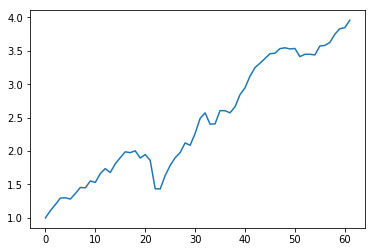

In [665]:
plt.plot(x);

In [666]:
SPY = pd.read_pickle(r'C:\Users\niels\data\SPY_cum_ret.pkl')
SPY = SPY.loc['2003-04-01':'2018-09-30']
SPY = SPY.resample('Q').ffill()
SPY['spy_cum_ret'] = (SPY['spy_cum_ret'] - SPY['spy_cum_ret'][0] + 1)
SPY['strategy'] = x

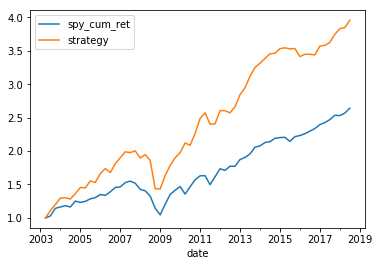

In [667]:
SPY.plot();

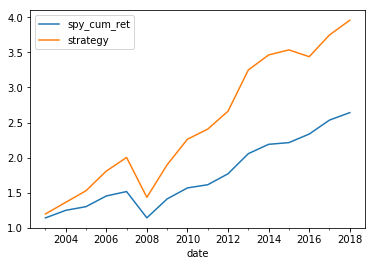

In [668]:
SPY = SPY.resample('Y').ffill()
SPY.plot();

In [669]:
strategy_mean_ret = (SPY['strategy'] - 1).diff().mean()
strategy_std = (SPY['strategy'] - 1).diff().std()
strategy_sr = strategy_mean_ret/strategy_std
print('Strategy Sharpe Ratio: ',strategy_sr)

Strategy Sharpe Ratio:  0.7008906503569611


In [670]:
x[-1]

3.956782545906896

In [671]:
SPY['spy_cum_ret'][-1]

2.64168

In [672]:
strategy_ret = (SPY['strategy'] - 1).diff().values[1:]
spy_ret = (SPY['spy_cum_ret'] - 1).diff().values[1:]

In [673]:
beta = (np.cov(spy_ret,strategy_ret)/np.var(spy_ret))[1,0]

In [674]:
beta

1.7240488971549255

In [675]:
residual_ret = strategy_ret - beta * spy_ret

In [676]:
IR = np.mean(residual_ret)/np.std(residual_ret)

In [677]:
IR

0.12127344584814333

In [678]:
alpha = np.mean(residual_ret)

In [679]:
alpha

0.011574388568345249